# STA130 Course Project Individual Proposals
### By: Tianyu "Terry" Zhao



## Introduction

In recent years, the impact of family support on individual mental wellness has garnered increasing attention, particularly in the context of significant societal changes such as the COVID-19 pandemic. This project proposal aims to explore the intricate relationship between family support and burnout levels, examining how these dynamics have shifted over time, especially during and after the pandemic. Utilizing the Multidimensional Social Support Scale and the Malach-Pines Burnout Measure, the analysis will focus on three key variables: family emotional support, feelings of hopelessness, and perceptions of worthlessness.

By employing a detailed mapping of responses to numerical scales, this study seeks to provide a nuanced understanding of how varying levels of family support correlate with burnout symptoms among individuals. Furthermore, the research will compare data from 2021, a period marked by the peak of the pandemic, to data from 2023, highlighting changes in family engagement and support systems during a critical transition period. Through regression analysis, this project will shed light on the evolving role of family connections in promoting mental wellness, offering insights that could inform future interventions and support mechanisms within families.

![](https://media3.giphy.com/media/amg2hcfGDkKt4Q3DpF/giphy.gif?cid=6c09b952l0vc62kw4lp2f56s5xzgonvzzasbu5uqk1ppfm84&ep=v1_internal_gif_by_id&rid=giphy.gif&ct=g)


## Data Organization 

Performed using the code that was provided. 

In [3]:
import pandas as pd
cols = pd.read_csv("var_names.csv")
data = pd.read_csv("CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data.shape

/tmp/ipykernel_180/2708844318.py:3: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("CSCS_data_anon.csv",


(11431, 1779)

In [4]:
# Let's just keep the recommended data
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()

missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()


pd.set_option('display.max_columns', dataV2_cohortV3.shape[1]) # Can cause jupyter notebooks to crash
# DO NOT USE in conjuection with pd.set_option('display.max_rows', 1000) 
dataV2_cohortV3

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_tired,WELLNESS_malach_pines_burnout_measure_disappointed,WELLNESS_malach_pines_burnout_measure_hopeless,WELLNESS_malach_pines_burnout_measure_trapped,WELLNESS_malach_pines_burnout_measure_helpless,WELLNESS_malach_pines_burnout_measure_depressed,WELLNESS_malach_pines_burnout_measure_sick,WELLNESS_malach_pines_burnout_measure_worthless,WELLNESS_malach_pines_burnout_measure_difficulty_sleeping,WELLNESS_malach_pines_burnout_measure_had_it,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_companionship,LONELY_ucla_loneliness_scale_left_out,LONELY_ucla_loneliness_scale_isolated,CONNECTION_social_num_close_friends_grouped,CONNECTION_social_days_family_p7d_grouped,CONNECTION_social_days_friends_p7d_grouped,CONNECTION_social_days_coworkers_and_classmates_p7d_grouped,CONNECTION_social_days_neighbours_p7d_grouped,CONNECTION_social_time_family_p7d_grouped,CONNECTION_social_time_friends_p7d_grouped,CONNECTION_social_time_coworkers_and_classmates_p7d_grouped,CONNECTION_social_time_neighbours_p7d_grouped,CONNECTION_social_num_family_p7d_grouped,CONNECTION_social_num_friends_p7d_grouped,CONNECTION_social_num_coworkers_and_classmates_p7d_grouped,CONNECTION_social_num_neighbours_p7d_grouped,CONNECTION_preference_time_family_grouped,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_neighbours_grouped,LONELY_dejong_emotional_social_loneliness_scale_emptiness,LONELY_dejong_emotional_social_loneliness_scale_rely,LONELY_dejong_emotional_social_loneliness_scale_trust,LONELY_dejong_emotional_social_loneliness_scale_close,LONELY_dejong_emotional_social_loneliness_scale_miss,LONELY_dejong_emotional_social_loneliness_scale_rejected,LONELY_direct,LONELY_change_pre_covid,LONELY_others_aware,PSYCH_zimet_multidimensional_social_support_scale_need,PSYCH_zimet_multidimensional_social_support_scale_joys,PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored,PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_comfort,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_feelings,PSYCH_zimet_multidimensional_social_support_scale_decisions,WELLNESS_self_rated_physical_health,WELLNESS_self_rated_me

## Set 1: Family Emotional Support and Mental Health (Hypothesis Testing)

### Variables
Family Support: **PSYCH_zimet_multidimensional_social_support_scale_family_emotional**, using a mapping scale from "Very Strongly Agree" to "Very Strongly Disagree" (assigned scores of 4 to 0, respectively).

Burnout: **WELLNESS_malach_pines_burnout_measure_hopeless** and **WELLNESS_malach_pines_burnout_measure_worthless**, with mapped scores based on response frequency (e.g., "Never" to "Often" assigned scores of 0 to 3).

### Hypotheses
**Null Hypothesis (H0)**: There is no significant relationship between family support and burnout levels; changes in family support do not affect hopelessness and worthlessness.

**Alternative Hypothesis (H1)**: There is a significant relationship between family support and burnout levels; higher levels of family support are associated with lower levels of hopelessness and worthlessness.

### Analysis
This analysis investigates the association between family emotional support and burnout scores. By utilizing the mapped scores for both family support and burnout measures, a two-sample t-test will compare average burnout levels based on different family support scores.

Steps include:

Mapping participants' responses regarding family support and burnout levels to numerical scores.

Calculating mean burnout scores for participants at varying levels of family support.

Conducting a two-sample t-test to assess whether higher family emotional support is linked to lower levels of hopelessness and worthlessness in burnout scores.

### Possible Results
If emotional support from family serves as a buffer against mental health strain, individuals with higher family support scores may demonstrate lower burnout scores in terms of hopelessness and worthlessness. A significant result would support the hypothesis that family emotional support is associated with reduced burnout.

### Relevance to Course Objectives
This analysis contributes to the understanding of the role of social support in mental wellness, specifically investigating whether family support can mitigate burnout. The method employs hypothesis testing to examine potential protective factors for mental health, aligning with the course's emphasis on the statistical analysis of social and psychological variables impacting wellness. This foundational analysis provides a basis for exploring more complex relationships between family support and mental health.

### Analysis so far...

T-test results for 'hopeless': t-statistic = -6.1368, p-value = 0.0000
T-test results for 'worthless': t-statistic = -6.2799, p-value = 0.0000


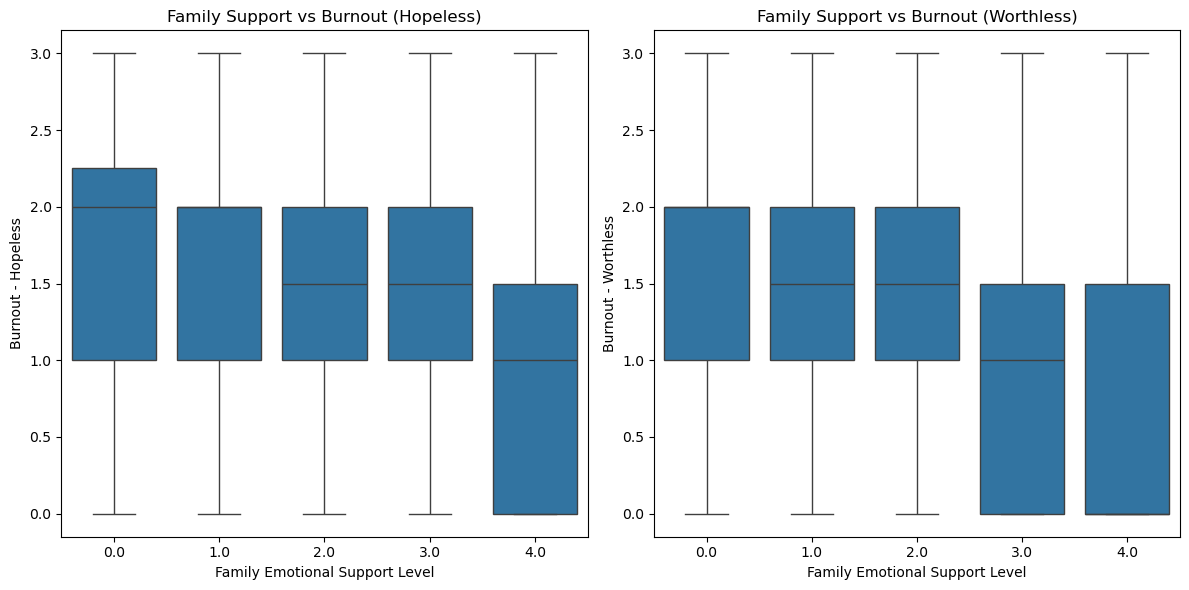

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Mapping the categorical data to numerical scores
support_map = {
    "Very Strongly Agree": 4,
    "Agree": 3,
    "Neither Agree Nor Disagree": 2,
    "Disagree": 1,
    "Very Strongly Disagree": 0
}

burnout_map = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3,
    "Almost never": 1.5  # Intermediate mapping for less common options
}

# Creating a copy to avoid altering the original dataset
df = dataV2_cohortV3.copy()

# Mapping the variables to numerical values
df['family_emotional_support'] = df['PSYCH_zimet_multidimensional_social_support_scale_family_emotional'].map(support_map)
df['burnout_hopeless'] = df['WELLNESS_malach_pines_burnout_measure_hopeless'].map(burnout_map)
df['burnout_worthless'] = df['WELLNESS_malach_pines_burnout_measure_worthless'].map(burnout_map)

# Dropping any rows with NaN values in these columns
df = df.dropna(subset=['family_emotional_support', 'burnout_hopeless', 'burnout_worthless'])

# Splitting the data into high and low family support groups
high_support = df[df['family_emotional_support'] >= 3]  # Agree or Very Strongly Agree
low_support = df[df['family_emotional_support'] < 3]    # Disagree, Strongly Disagree, Neutral

# Performing t-tests
t_stat_hopeless, p_val_hopeless = ttest_ind(high_support['burnout_hopeless'], low_support['burnout_hopeless'])
t_stat_worthless, p_val_worthless = ttest_ind(high_support['burnout_worthless'], low_support['burnout_worthless'])

# Print the t-test results
print(f"T-test results for 'hopeless': t-statistic = {t_stat_hopeless:.4f}, p-value = {p_val_hopeless:.4f}")
print(f"T-test results for 'worthless': t-statistic = {t_stat_worthless:.4f}, p-value = {p_val_worthless:.4f}")

# Visualizations
plt.figure(figsize=(12, 6))

# Boxplots for hopeless burnout
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='family_emotional_support', y='burnout_hopeless')
plt.title('Family Support vs Burnout (Hopeless)')
plt.xlabel('Family Emotional Support Level')
plt.ylabel('Burnout - Hopeless')

# Boxplots for worthless burnout
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='family_emotional_support', y='burnout_worthless')
plt.title('Family Support vs Burnout (Worthless)')
plt.xlabel('Family Emotional Support Level')
plt.ylabel('Burnout - Worthless')

plt.tight_layout()
plt.show()


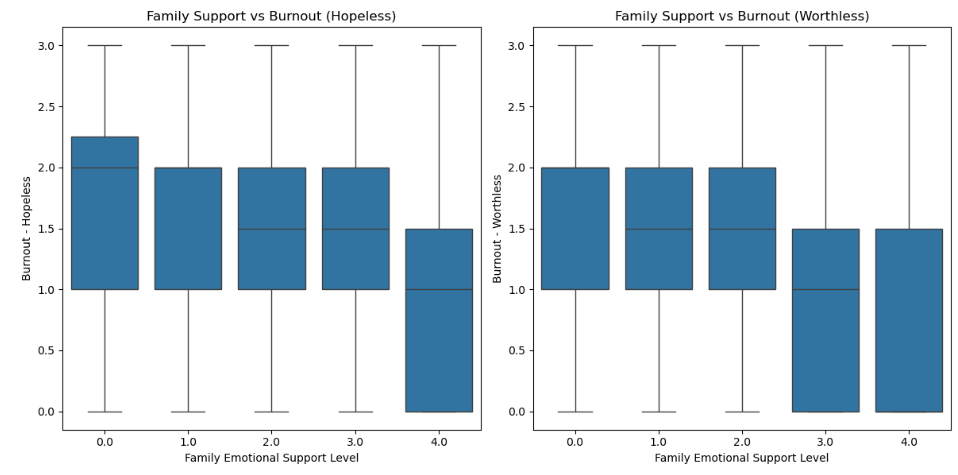

#### Explanation of Results

The results from the t-tests provide significant insights into the relationship between family emotional support and burnout symptoms, specifically feelings of hopelessness and worthlessness.

#### Hopelessness and Family Support
The t-test for the burnout_hopeless variable yielded a t-statistic of -6.1368 with a p-value of 0.0000. Since the p-value is well below the 0.05 significance level, we reject the null hypothesis (H0) that there is no significant relationship between family emotional support and levels of hopelessness. This finding provides strong evidence in support of the alternative hypothesis (H1), which posits that higher levels of family emotional support are associated with lower levels of hopelessness. The negative t-statistic indicates that individuals with higher family emotional support report significantly lower levels of hopelessness compared to those with lower family support, suggesting that family emotional support may function as a protective factor against feelings of hopelessness.

#### Worthlessness and Family Support
Similarly, the t-test for the burnout_worthless variable produced a t-statistic of -6.2799 and a p-value of 0.0000. This result is also statistically significant, allowing us to reject the null hypothesis for this variable as well. The data supports the alternative hypothesis that higher levels of family emotional support correlate with lower levels of feeling worthless. Again, the negative t-statistic implies that individuals who perceive strong emotional support from their families are less likely to experience feelings of worthlessness compared to those with less support.

#### Interpretation and Relevance
These findings emphasize the critical role that strong family support plays in enhancing mental wellness, particularly in alleviating specific negative mental health outcomes such as feelings of hopelessness and worthlessness. By rejecting the null hypotheses for both burnout measures, we provide robust evidence that family support positively influences mental wellness.

#### Connection to Project Objectives
This analysis serves as a crucial foundation for further exploration into the impact of family and other forms of social support on mental wellness. Understanding the relationship between family support and burnout symptoms is vital, as it can inform future research on the broader social factors influencing mental health. By establishing a strong correlation in this analysis, we create a basis for comparison with other variables in subsequent sets, particularly regarding changes in engagement due to the pandemic in Sets 2 and 3. This comprehensive examination of social support’s influence on mental health aligns with the project's statistical objectives, employing hypothesis testing to derive meaningful, data-driven insights into the effect of family support on mental wellness.

## Set 2: Impact of the Pandemic on Family Engagement (Regression Analysis)

### Variables
Pre- and During-Pandemic Family Engagement: **CONNECTION_activities_talked_family_p3m**, **CONNECTION_activities_phone_p3m**, **CONNECTION_activities_video_chat_p3m**, and other related variables (e.g., physical vs. virtual meetings).

Pandemic Timeframe: Using the variable **SURVEY_recorded_date** to separate responses before and during the pandemic.

### Analysis
For this set, a simple linear regression could assess the relationship between the pandemic period and changes in family engagement types. Specifically, we could analyze if virtual family engagement (e.g., video chats, phone calls) increased as in-person engagement decreased over time.

The independent variable would be the timeframe (pre-pandemic vs. during-pandemic), and the dependent variable would be different types of engagement frequencies.
This model would help quantify the increase or decrease in family engagement modes over time, with a focus on how these changes align with pandemic impacts.

### Possible Results
We expect to see an increase in virtual family engagement (like video calls and messaging) as physical engagement opportunities declined due to pandemic restrictions. If virtual engagement rose significantly, it may show that families adapted to maintain connection, potentially mitigating the pandemic's isolating effects.

### Relevance to Course Objectives
This analysis sheds light on how major events like the pandemic shift social behaviors and how these shifts may impact family dynamics. Insights from this set would contribute to understanding resilience strategies and social adaptation under stress, a key focus in studying wellness.

## Set 3: Loneliness and Mental Health in Response to Engagement Changes (Confidence Intervals and Hypothesis Testing)

### Variables
Loneliness Measures: **LONELY_ucla_loneliness_scale_isolated**, **LONELY_ucla_loneliness_scale_left_out**, **LONELY_ucla_loneliness_scale_companionship**.

Mental Health: Using wellness measures such as **WELLNESS_subjective_happiness_scale_happy and WELLNESS_phq_score**.

Pandemic Timeframe: Using the variable **SURVEY_recorded_date** to separate responses before and during the pandemic.

### Hypotheses

**Null Hypothesis (H0)**: There is no significant difference in average loneliness scores from pre-pandemic levels to during the pandemic; the average loneliness score during the pandemic is equal to or lower than before the pandemic.

**Alternative Hypothesis (H1)**: The average loneliness score during the pandemic is significantly higher than pre-pandemic levels; there is a significant increase in loneliness during the pandemic.

### Analysis
In this set, a one-sample hypothesis test will be conducted to determine whether loneliness scores differ significantly from pre-pandemic levels to during the pandemic. Additionally, confidence intervals around average loneliness and happiness scores will provide a range of likely values for these outcomes, offering insights into the stability or change of mental health indicators over time.

We will calculate confidence intervals for loneliness and happiness scores during the pandemic and compare them to pre-pandemic levels. The hypothesis being tested is that the average loneliness score during the pandemic is higher than that before the pandemic, utilizing a one-sample test against a pre-pandemic baseline.

### Possible Results
If loneliness scores increase significantly during the pandemic, this may indicate that changes in family engagement (as observed in Set 2) were insufficient to fully mitigate the isolating effects of the pandemic. Confidence intervals that do not overlap with pre-pandemic scores would support a significant shift in loneliness and mental health metrics.

### Relevance to Course Objectives
This analysis emphasizes understanding the psychological toll of the pandemic and the effectiveness of adapted social practices (such as increased virtual engagement) in maintaining mental wellness. It provides a holistic perspective on how family support and changes in engagement translate into emotional outcomes like loneliness, directly aligning with the project's objectives related to wellness.

## Proposal Summary: 

This research project investigates the intricate relationship between family support, loneliness, and mental health, particularly in the context of the COVID-19 pandemic. Our objective is to examine how variations in family emotional support and engagement have influenced mental wellness outcomes, such as feelings of burnout and loneliness, during and after this global crisis.

### Key Components:
**Set 1: Family Emotional Support and Mental Health**
This segment focuses on the impact of family emotional support on burnout levels, specifically examining feelings of hopelessness and worthlessness. We hypothesize that higher family support correlates with lower burnout symptoms, assessed through t-tests and visualizations to compare scores across different support levels. The findings are expected to highlight family support as a protective factor for mental health.

**Set 2: Engagement Changes and Family Dynamics**
In this section, we explore how changes in family engagement during the pandemic affect mental health outcomes. This includes analyzing data on family activities and communication methods, with a focus on understanding the dynamics that contribute to emotional wellness. Our analysis aims to reveal trends that can inform strategies for fostering family engagement during challenging times.

**Set 3: Loneliness and Mental Health in Response to Engagement Changes**
The final component examines how loneliness levels have shifted pre- and during the pandemic, with a specific focus on the effectiveness of family support in alleviating these feelings. Using one-sample hypothesis testing and confidence intervals, we aim to determine if there has been a significant increase in loneliness and assess its correlation with mental health indicators such as happiness and depressive symptoms.

### Overall Goals:
Through this comprehensive analysis, we aim to contribute valuable insights into the role of family support and engagement in promoting mental wellness. By investigating these relationships, we seek to provide evidence-based recommendations for fostering emotional resilience in families, particularly during periods of crisis. This project aligns with the objectives of examining social support and psychological variables, offering a foundation for future research on the complex interplay between family dynamics and mental health.

## ChatGPT Support and Summary of Conversations: 

Statistics Project: You are working on a statistics project focusing on the relationship between family support, loneliness, and mental health during the COVID-19 pandemic. Your project includes three sets of analyses:

Set 1: Examines the impact of family emotional support on burnout levels (feelings of hopelessness and worthlessness). You formulated null and alternative hypotheses, and after performing a t-test, found significant results indicating that higher family support correlates with lower burnout symptoms.

Set 2: Analyzes changes in family engagement during the pandemic and their effects on mental health outcomes. This set aims to understand how family dynamics contribute to emotional wellness.

Set 3: Investigates shifts in loneliness levels before and during the pandemic, utilizing one-sample hypothesis testing and confidence intervals. You proposed hypotheses about the increase in loneliness and its correlation with mental health indicators.

Hypotheses: For Set 1, you defined your null and alternative hypotheses clearly. In your discussion, you emphasized the implications of rejecting the null hypotheses based on your findings from the t-tests.

Project Proposals: You worked on refining your project proposal descriptions, ensuring clarity and precision, and incorporating the hypotheses into the analysis sections for each set.

Proposal Summary: You requested and received a comprehensive summary of your proposal, highlighting the goals and key components of your project.

**Conversation 1**: https://chatgpt.com/share/67299910-bcc8-800e-b98d-62efe6939925

**Conversation 2**: https://chatgpt.com/share/67299906-8ddc-800e-b84f-cfe081750cc4

## Group Preference: Weiyanshu "Hazel" Yu, Shuran "Sunny" Cui, Annie Xu 
My apologies as I am unable to find their Quercus names